In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned data
data = pd.read_csv('cleaned_obd_data.csv')

# Drop NaN columns
data = data.dropna(axis=1, how='all')

# Drop'Unnamed' columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

data.head()


,Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Throttle Position(Manifold)(%)
0,2623.25,30,92.549019,32.549019
1,3169.50,30,90.980392,32.549019
2,2587.50,30,98.431374,37.647060
3,2753.00,30,98.039215,39.215687
4,2957.00,30,96.862747,38.823528


In [5]:
print("----- Average Values -----")
print("Average Engine RPM:", data['Engine RPM(rpm)'].mean())
print("Average Engine Load (%):", data['Engine Load(%)'].mean())
print("Average Intake Air Temp (°C):", data['Intake Air Temperature(°C)'].mean())
print("Average Throttle Position (%):", data['Throttle Position(Manifold)(%)'].mean())

----- Average Values -----
Average Engine RPM: 1738.828539823009
Average Engine Load (%): 55.49742698800148
Average Intake Air Temp (°C): 31.17920353982301
Average Throttle Position (%): 22.547573990073744


In [21]:
# Find instances with high RPM (>3000)
high_rpm = data[data['Engine RPM(rpm)'] > 3000]

high_rpm.head()


,Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Throttle Position(Manifold)(%)
1,3169.50,30,90.980392,32.549019
5,3158.50,30,97.254906,40.000000
6,3430.25,30,95.294121,40.392159
93,3098.25,30,95.686279,36.862747
94,3257.75,30,91.764709,27.450981


In [22]:
# Find instances with high Engine Load (>80%)
high_load = data[data['Engine Load(%)'] > 80]

high_load.head()


,Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Throttle Position(Manifold)(%)
0,2623.25,30,92.549019,32.549019
1,3169.50,30,90.980392,32.549019
2,2587.50,30,98.431374,37.647060
3,2753.00,30,98.039215,39.215687
4,2957.00,30,96.862747,38.823528


In [23]:
# Combine high RPM OR high Load
high_risk = pd.concat([high_rpm, high_load]).drop_duplicates()

high_risk.head()


,Engine RPM(rpm),Intake Air Temperature(°C),Engine Load(%),Throttle Position(Manifold)(%)
1,3169.50,30,90.980392,32.549019
5,3158.50,30,97.254906,40.000000
6,3430.25,30,95.294121,40.392159
93,3098.25,30,95.686279,36.862747
94,3257.75,30,91.764709,27.450981


In [13]:
# Save the high-risk instances into a new file
high_risk.to_csv('high_risk_vehicles.csv', index=False)


In [14]:
print("----- Risky Instance Counts -----")
print("Number of instances with high RPM (>3000):", len(high_rpm))
print("Number of instances with high Engine Load (>80%):", len(high_load))
print("Total unique risky instances (high RPM or high Load):", len(high_risk))


----- Risky Instance Counts -----
Number of instances with high RPM (>3000): 20
Number of instances with high Engine Load (>80%): 365
Total unique risky instances (high RPM or high Load): 366


In [15]:
print("Total number of data points in the dataset:", len(data))

Total number of data points in the dataset: 1356


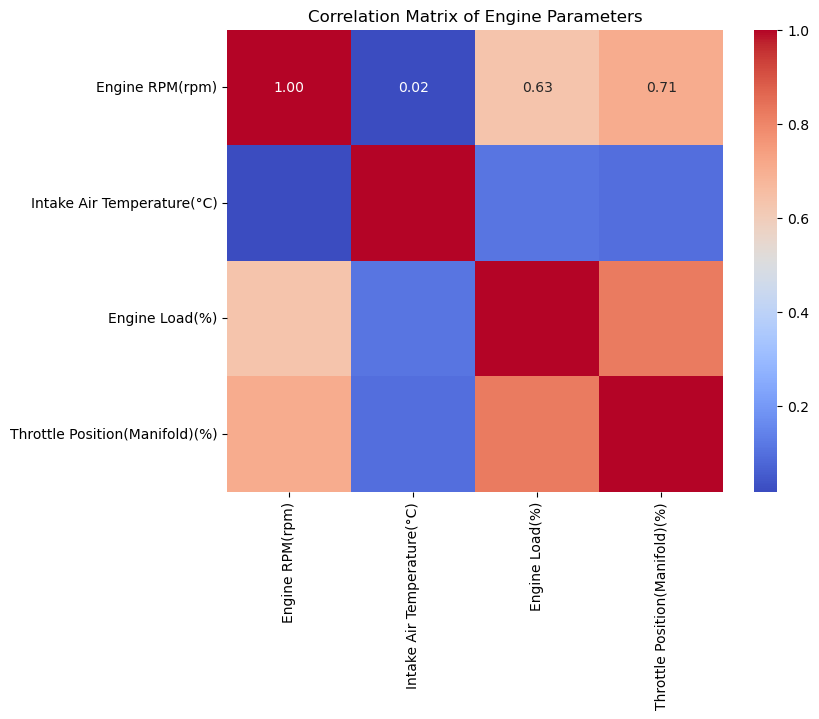

In [25]:
data = pd.read_csv('cleaned_obd_data.csv')

# Drop NaN columns
data = data.dropna(axis=1, how='all')

# Drop'Unnamed' columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Calculate correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Engine Parameters')
plt.show()
